### Data prep

In [2]:
import pandas as pd
from scipy.stats import shapiro
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import spacy

In [3]:
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [4]:
df = pd.read_csv('movies.csv')
df

,id,title,release year,certificate,runtime,genre,rating,summary,directors,actors,lifetime gross in $
0,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2922917914
1,tt4154796,Avengers: Endgame,2019,PG-13,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2797501328
2,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",2201647264
3,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138 min,"Action, Adventure, Sci-Fi",7.8,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2069521700
4,tt4154756,Avengers: Infinity War,2018,PG-13,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2048359754
...,...,...,...,...,...,...,...,...,...,...,...
995,tt1536044,Paranormal Activity 2,2010,R,91 min,"Horror, Mystery",5.7,After experiencing what they think are a serie...,Tod Williams,"Katie Featherston, Micah Sloat, Molly Ephraim,...",177512032
996,tt0251127,How to Lose a Guy in 10 Days,2003,PG-13,116 min,"Comedy, Romance",6.4,Benjamin Barry is an advertising executive and...,Donald Petrie,"Kate Hudson, Matthew McConaughey, Adam Goldber...",177502387
997,tt0370263,Alien vs. Predator,2004,PG-13,101 min,"Action, Adventure, Horror",5.6,During an archaeological expedition on Bouvetø...,Paul W.S. Anderson,"Sanaa Lathan, Lance Henriksen, Raoul Bova, Ewe...",177427090
998,tt0299977,Hero,2002,PG-13,120 min,"Action, Adventure, Drama",7.9,"A defense officer, Nameless, was summoned by t...",Yimou Zhang,"Jet Li, Tony Leung Chiu-wai, Maggie Cheung, Zi...",177395557


In [6]:


# Loop through all values in the 'release year' column and remove non-numeric characters
for i in range(len(df['release year'])):
    df.at[i, 'release year'] = ''.join(filter(str.isdigit, str(df.at[i, 'release year'])))
    
# Clean the 'release year' column
for i in range(len(df['release year'])):
    df.at[i, 'release year'] = ''.join(filter(str.isdigit, str(df.at[i, 'release year'])))

# Convert the cleaned 'release year' column to integers
df['release year'] = df['release year'].astype(int)

# Convert the 'runtime' column to integers
df['runtime'] = df['runtime'].str.split().str[0].astype(int)

df.to_csv('movies_cleaned.csv', index=False)

AttributeError: Can only use .str accessor with string values!

In [3]:
# number of columns and rows in the dataframe.
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# type of data in the dataframe columns.
df.dtypes

Number of rows: 1000
Number of columns: 11


id                      object
title                   object
release year             int32
certificate             object
runtime                  int32
genre                   object
rating                 float64
summary                 object
directors               object
actors                  object
lifetime gross in $      int64
dtype: object

In [8]:
# descriptive parameters of the numeric data (mean, median, mode, min, max, range, count)



# Getting numeric values from original Dataframe.
numeric_df = df[['rating', 'lifetime gross in $', 'runtime', 'release year']]

# convert multiple columns to lists
list_of_ratings = numeric_df['rating'].tolist()
list_of_gross = numeric_df['lifetime gross in $'].tolist()
list_of_runtime = numeric_df['runtime'].tolist()
list_of_release_year = numeric_df['release year'].tolist()
combined_list = [list_of_ratings, list_of_gross, list_of_runtime, list_of_release_year]

# calculate the sum, count, mean, median, mode, variance, and standard deviation
for i, col in zip(combined_list, ['rating', 'lifetime gross in $', 'runtime', 'release year']):
    # print the results
    print(f"Descriptive parameters of {col}:\n")
    print(f"Mean: {sum(i) / len(i)}")
    print(f"Median: {statistics.median(i)}")
    print(f"Mode: {statistics.mode(i)}")
    print(f"Min: {min(i)}")
    print(f"Max: {max(i)}")
    print(f"Range: {max(i) - min(i)}")
    print(f"Count: {len(i)} \n")

Descriptive parameters of rating:

Mean: 6.801100000000004
Median: 6.8
Mode: 6.5
Min: 2.6
Max: 9.2
Range: 6.6
Count: 1000 

Descriptive parameters of lifetime gross in $:

Mean: 413972057.275
Median: 310981604.5
Mode: 2922917914
Min: 177378645
Max: 2922917914
Range: 2745539269
Count: 1000 

Descriptive parameters of runtime:

Mean: 117.794
Median: 116.0
Mode: 115
Min: 69
Max: 238
Range: 169
Count: 1000 

Descriptive parameters of release year:

Mean: 2007.758
Median: 2010.0
Mode: 2017
Min: 1937
Max: 2022
Range: 85
Count: 1000 



### In this chart we vizualize a bar chart that shows the average rating for every 100 movie in our dataset

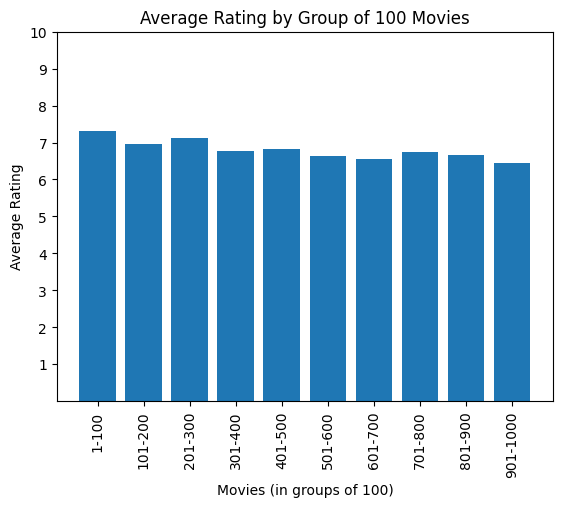

In [25]:
# group the movies by index in increments of 100
groups = df.groupby(df.index // 100)

# calculate the average rating for each group
avg_ratings = groups.mean()['rating']

# create a list of x-axis labels (bar labels)
bar_labels = ['{}-{}'.format(i * 100 + 1, (i + 1) * 100) for i in range(10)]

# create a bar chart
fig, ax = plt.subplots()
ax.bar(bar_labels, avg_ratings)
ax.set_xlabel('Movies (in groups of 100)')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Group of 100 Movies')
plt.xticks(rotation=90)
ax.set_yticks(range(1, 11))
plt.show()

### A pie chart to show how many of each certificate movies

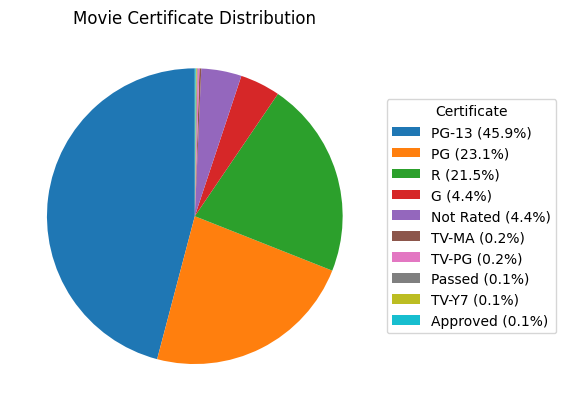

In [32]:
# count the number of movies in each certificate category
certificate_counts = df['certificate'].value_counts()

# calculate the percentage of movies in each certificate category
certificate_percentages = certificate_counts / certificate_counts.sum() * 100

# create a pie chart with a legend
fig, ax = plt.subplots()
ax.pie(certificate_counts, labels=None, autopct='', startangle=90)
ax.set_title('Movie Certificate Distribution')

# add the percentage to the legend
legend_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(certificate_counts.index, certificate_percentages)]
ax.legend(legend_labels, title="Certificate", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [6]:
# Exploring the missing values values in the dataset.

# Count the number of missing values in each column
missing_count = df.isna().sum()

# Select the column names with missing values
missing_cols = missing_count[missing_count > 0].index.tolist()

# Print the column names with missing values and their respective missing value counts
if len(missing_cols) > 0:
    for col in missing_cols:
        print(f"{col}: {missing_count[col]} missing values")
else:
    print("No missing values in the dataframe.")

No missing values in the dataframe.


### Correlation matrix

In [9]:
# create a new DataFrame from the combined_list
new_df = pd.DataFrame({
    'rating': combined_list[0],
    'lifetime gross in $': combined_list[1],
    'runtime': combined_list[2],
    'release year': combined_list[3]
})

# create a correlation matrix for the new DataFrame
corr_matrix = new_df.corr()

# print the correlation matrix
print(corr_matrix)

                       rating  lifetime gross in $   runtime  release year
rating               1.000000             0.253002  0.359312     -0.172461
lifetime gross in $  0.253002             1.000000  0.300148      0.197671
runtime              0.359312             0.300148  1.000000      0.027435
release year        -0.172461             0.197671  0.027435      1.000000


In [43]:
nlp = spacy.load("en_core_web_sm")

In [48]:
def preprocess_text(text):
    
    # Tokenize the text and remove stop words and punctuation
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    return tokens 

In [50]:
# Create a new column called tokens with the tokenized information from the summary column.
df['tokens'] = df['summary'].apply(lambda x: preprocess_text(x))

df

,id,title,release year,certificate,runtime,genre,rating,summary,directors,actors,lifetime gross in $,tokens
0,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2922917914,"[paraplegic, marine, dispatch, moon, pandora, ..."
1,tt4154796,Avengers: Endgame,2019,PG-13,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2797501328,"[devastating, event, avengers, infinity, war, ..."
2,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",2201647264,"[seventeen, year, old, aristocrat, fall, love,..."
3,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138 min,"Action, Adventure, Sci-Fi",7.8,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2069521700,"[new, threat, galaxy, rise, rey, desert, scave..."
4,tt4154756,Avengers: Infinity War,2018,PG-13,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2048359754,"[avengers, ally, willing, sacrifice, attempt, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,tt1536044,Paranormal Activity 2,2010,R,91 min,"Horror, Mystery",5.7,After experiencing what they think are a serie...,Tod Williams,"Katie Featherston, Micah Sloat, Molly Ephraim,...",177512032,"[experience, think, series, break, in, family,..."
996,tt0251127,How to Lose a Guy in 10 Days,2003,PG-13,116 min,"Comedy, Romance",6.4,Benjamin Barry is an advertising executive and...,Donald Petrie,"Kate Hudson, Matthew McConaughey, Adam Goldber...",177502387,"[benjamin, barry, advertising, executive, lady..."
997,tt0370263,Alien vs. Predator,2004,PG-13,101 min,"Action, Adventure, Horror",5.6,During an archaeological expedition on Bouvetø...,Paul W.S. Anderson,"Sanaa Lathan, Lance Henriksen, Raoul Bova, Ewe...",177427090,"[archaeological, expedition, bouvetøya, island..."
998,tt0299977,Hero,2002,PG-13,120 min,"Action, Adventure, Drama",7.9,"A defense officer, Nameless, was summoned by t...",Yimou Zhang,"Jet Li, Tony Leung Chiu-wai, Maggie Cheung, Zi...",177395557,"[defense, officer, nameless, summon, king, qin..."
